In [27]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from libsvm import svmutil
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import time

In [28]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist.data, mnist.target
# Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Original pixel values as features
X_original = mnist.data.astype(float)

# Perform PCA for feature extraction
n_components = 50 
pca = PCA(n_components=n_components, random_state=42)

# Standardize the data before applying PCA
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_original)

# Fit PCA to the standardized data
X_pca = pca.fit_transform(X_standardized)

X_pca = X_pca[:10000]
y = y[:10000]

/Users/fahmiyansyah/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## 90:10 Perform PCA

In [29]:
# Split data into 90% training and 10% testing
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_pca, y, test_size=0.1, random_state=42)

# Print the dimensions of the training and testing sets
print("Ratio 90:10")
print("Training data dimensions:")
print("X_train:", X_train_cnn.shape)
print("y_train:", y_train_cnn.shape)
print("Testing data dimensions:")
print("X_test:", X_test_cnn.shape)
print("y_test:", y_test_cnn.shape)

Ratio 90:10
Training data dimensions:
X_train: (9000, 50)
y_train: (9000,)
Testing data dimensions:
X_test: (1000, 50)
y_test: (1000,)


### Comparing each classification model

In [45]:
# Load and preprocess the MNIST dataset
(x_train_cnn, y_train_cnn), (x_test_cnn, y_test_cnn) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
x_train_cnn = x_train_cnn.astype('float32') / 255.0
x_test_cnn = x_test_cnn.astype('float32') / 255.0

# One-hot encode the labels
y_train_cnn = to_categorical(y_train_cnn, 10)
y_test_cnn = to_categorical(y_test_cnn, 10)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Measure training time for CNN
start_time = time.time()
model.fit(x_train_cnn.reshape(-1, 28, 28, 1), y_train_cnn, epochs=10, batch_size=64, validation_split=0.2)
training_time = time.time() - start_time

# Measure testing time for CNN
start_time = time.time()
test_loss, test_accuracy = model.evaluate(x_test_cnn.reshape(-1, 28, 28, 1), y_test_cnn)
testing_time = time.time() - start_time

# Print the results for CNN
print("CNN - Training Time:", training_time, "seconds")
print("CNN - Testing Time:", testing_time, "seconds")
print("CNN - Test Accuracy:", test_accuracy)

# Split data into 90% training and 10% testing
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)

# Create an SVM classifier with a polynomial kernel
svm_poly_classifier = SVC(kernel='poly', degree=3, random_state=42)

# Measure training time
start_time = time.time()
svm_poly_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the testing data
start_time = time.time()
y_pred_poly = svm_poly_classifier.predict(X_test)
testing_time = time.time() - start_time

# Evaluate the classifier's performance
accuracy_poly = accuracy_score(y_test, y_pred_poly)

# Print the results
print("SVM (Polynomial Kernel) - Training Time:", training_time, "seconds")
print("SVM (Polynomial Kernel) - Testing Time:", testing_time, "seconds")
print("SVM (Polynomial Kernel) - Accuracy:", accuracy_poly)

# Create an SVM classifier with a linear kernel
svm_linear_classifier = SVC(kernel='linear', random_state=42)

# Measure training time
start_time = time.time()
svm_linear_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the testing data
start_time = time.time()
y_pred_linear = svm_linear_classifier.predict(X_test)
testing_time = time.time() - start_time

# Evaluate the classifier's performance
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Print the results
print("SVM (Linear Kernel) - Training Time:", training_time, "seconds")
print("SVM (Linear Kernel) - Testing Time:", testing_time, "seconds")
print("SVM (Linear Kernel) - Accuracy:", accuracy_linear)

# Create an SVM classifier with an RBF kernel
svm_rbf_classifier = SVC(kernel='rbf', random_state=42)

# Measure training time
start_time = time.time()
svm_rbf_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the testing data
start_time = time.time()
y_pred_rbf = svm_rbf_classifier.predict(X_test)
testing_time = time.time() - start_time

# Evaluate the classifier's performance
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Print the results
print("SVM (RBF Kernel) - Training Time:", training_time, "seconds")
print("SVM (RBF Kernel) - Testing Time:", testing_time, "seconds")
print("SVM (RBF Kernel) - Accuracy:", accuracy_rbf)

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Measure training time
start_time = time.time()
naive_bayes_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions on the testing data
start_time = time.time()
y_pred_nb = naive_bayes_classifier.predict(X_test)
testing_time = time.time() - start_time

# Evaluate the classifier's performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print the results
print("Naive Bayes - Training Time:", training_time, "seconds")
print("Naive Bayes - Testing Time:", testing_time, "seconds")
print("Naive Bayes - Accuracy:", accuracy_nb)


Epoch 1/10
750/750 [==============================] - 15s 20ms/step - loss: 0.2670 - accuracy: 0.9175 - val_loss: 0.0634 - val_accuracy: 0.9810
Epoch 2/10
750/750 [==============================] - 13s 18ms/step - loss: 0.0929 - accuracy: 0.9719 - val_loss: 0.0451 - val_accuracy: 0.9856
Epoch 3/10
750/750 [==============================] - 15s 19ms/step - loss: 0.0686 - accuracy: 0.9796 - val_loss: 0.0377 - val_accuracy: 0.9881
Epoch 4/10
750/750 [==============================] - 14s 19ms/step - loss: 0.0559 - accuracy: 0.9830 - val_loss: 0.0360 - val_accuracy: 0.9894
Epoch 5/10
750/750 [==============================] - 13s 17ms/step - loss: 0.0450 - accuracy: 0.9862 - val_loss: 0.0346 - val_accuracy: 0.9898
Epoch 6/10
750/750 [==============================] - 15s 20ms/step - loss: 0.0386 - accuracy: 0.9875 - val_loss: 0.0315 - val_accuracy: 0.9906
Epoch 7/10
750/750 [==============================] - 14s 19ms/step - loss: 0.0333 - accuracy: 0.9898 - val_loss: 0.0358 - val_accuracy:

### Display Data After Comparing

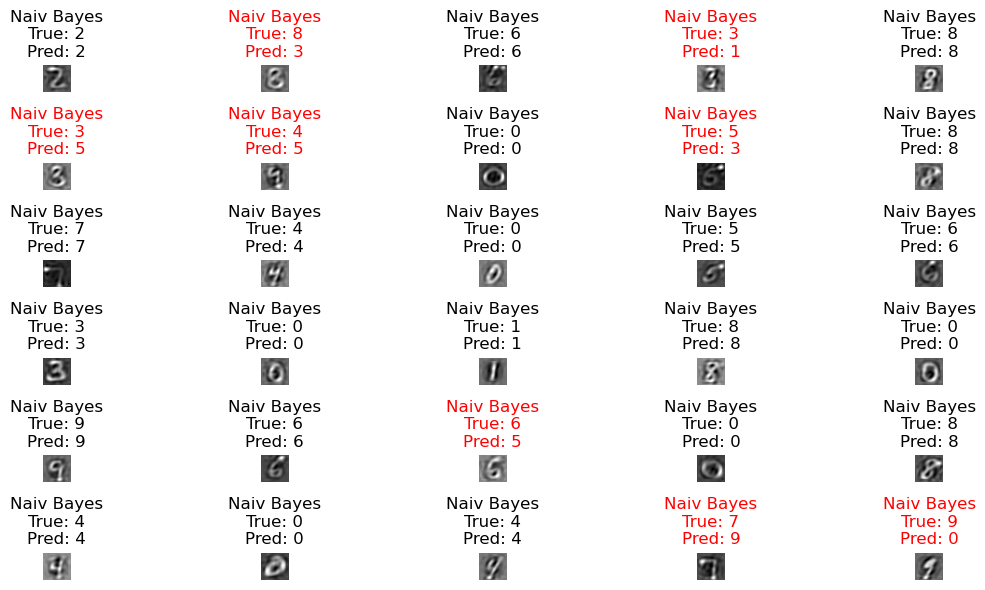

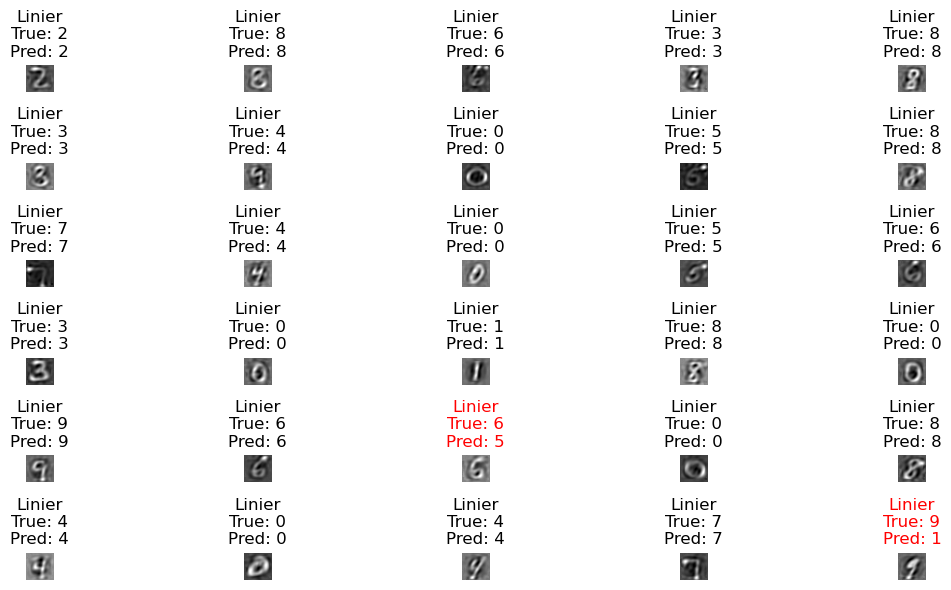

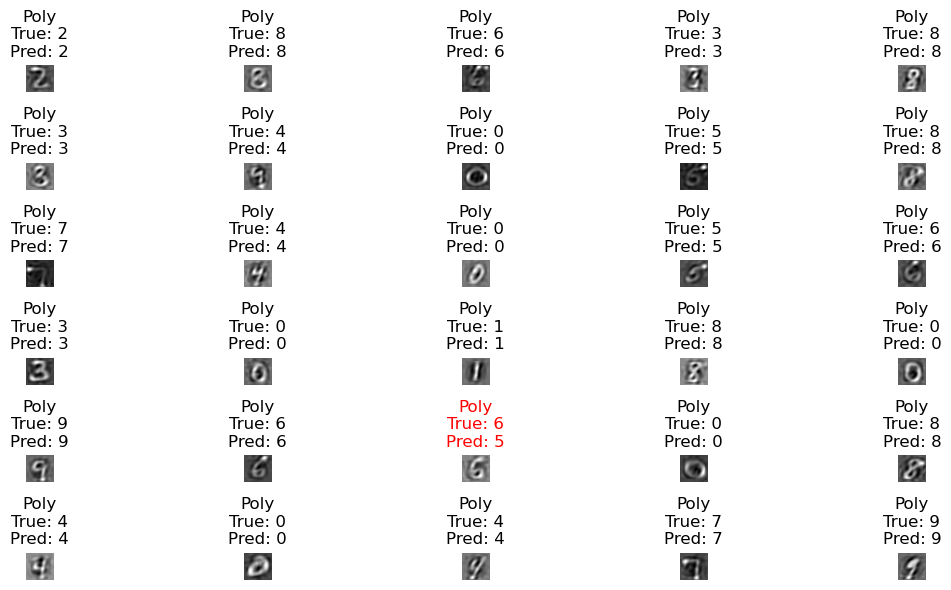

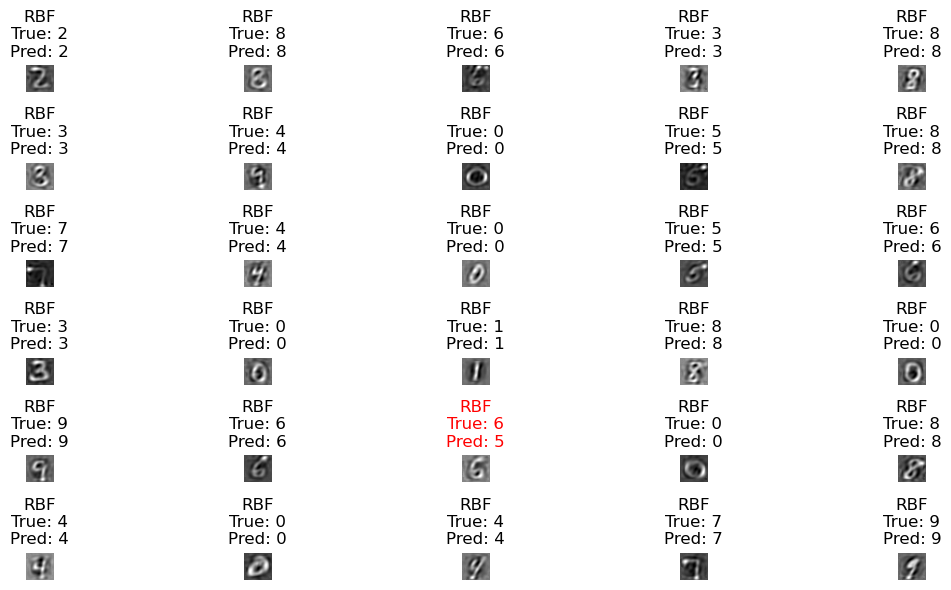

313/313 [==============================] - 1s 2ms/step


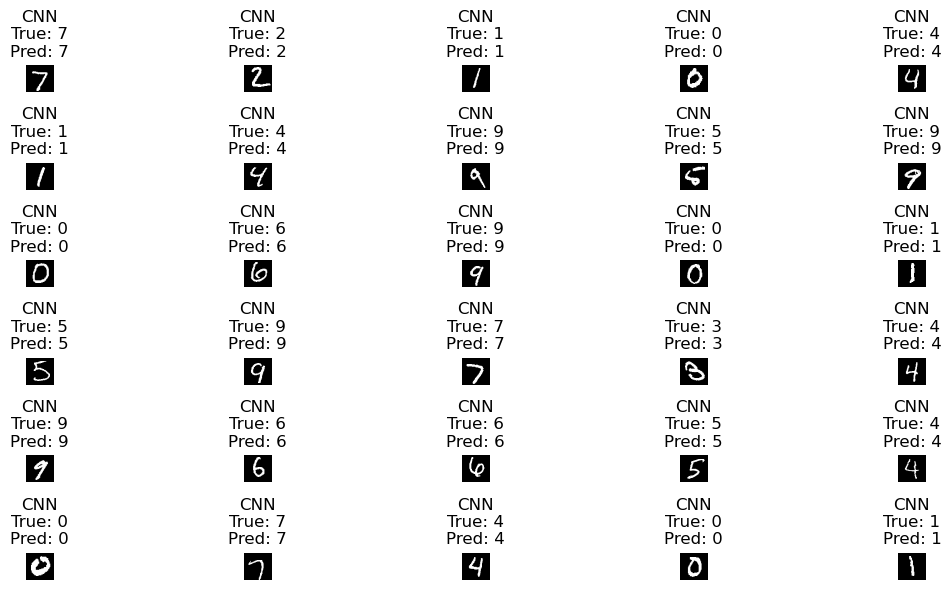

In [50]:
# Select multiple samples of test data to display
n_samples_to_display = 30

# Uses PCA components to return the image to its original form
X_restored = pca.inverse_transform(X_test)

# Initialize correct labels (ground truth) and predicted labels
true_labels = y_test
predicted_labels = y_pred_nb

plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")
    # Check if there are elements in true_labels and predicted_label
    if true_labels[i] == predicted_labels[i]:
         text_color = 'black' # If the prediction is correct, the text is black
    else:
         text_color = 'red' # If the prediction is wrong, the text is red
         
    plt.title(f"Naiv Bayes\nTrue: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

# Initialize correct labels (ground truth) and predicted labels
true_labels = y_test
predicted_labels = y_pred_linear

plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")
    # Check if there are elements in true_labels and predicted_label
    if true_labels[i] == predicted_labels[i]:
         text_color = 'black' # If the prediction is correct, the text is black
    else:
         text_color = 'red' # If the prediction is wrong, the text is red
         
    plt.title(f"Linier\nTrue: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

# Initialize correct labels (ground truth) and predicted labels
true_labels = y_test
predicted_labels = y_pred_poly

plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")
    # Check if there are elements in true_labels and predicted_label
    if true_labels[i] == predicted_labels[i]:
         text_color = 'black' # If the prediction is correct, the text is black
    else:
         text_color = 'red' # If the prediction is wrong, the text is red
         
    plt.title(f"Poly\nTrue: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

# Initialize correct labels (ground truth) and predicted labels
true_labels = y_test
predicted_labels = y_pred_rbf

plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    plt.imshow(X_restored[i].reshape(28, 28), cmap="gray")
    # Check if there are elements in true_labels and predicted_label
    if true_labels[i] == predicted_labels[i]:
         text_color = 'black' # If the prediction is correct, the text is black
    else:
         text_color = 'red' # If the prediction is wrong, the text is red
         
    plt.title(f"RBF\nTrue: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")
plt.tight_layout()
plt.show()

# Select multiple samples of test data to display
n_samples_to_display = 30

# Get model predictions for the test data
y_pred_cnn = model.predict(x_test_cnn.reshape(-1, 28, 28, 1))

# Initialize correct labels (ground truth) and predicted labels
true_labels = np.argmax(y_test_cnn, axis=1)  # Convert one-hot encoded labels to integers
predicted_labels = np.argmax(y_pred_cnn, axis=1)  # Convert one-hot encoded predictions to integers

plt.figure(figsize=(12, 6))
for i in range(min(n_samples_to_display, len(true_labels), len(predicted_labels))):
    plt.subplot(6, 5, i + 1)
    plt.imshow(x_test_cnn[i].reshape(28, 28), cmap="gray")  # Display the original image
    if true_labels[i] == predicted_labels[i]:
        text_color = 'black'  # If the prediction is correct, the text is black
    else:
        text_color = 'red'  # If the prediction is wrong, the text is red
    plt.title(f"CNN\nTrue: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
    plt.axis("off")

plt.tight_layout()
plt.show()





### Conclusion

A Convolutional Neural Network (CNN), Support Vector Machines (SVM) with various kernels (Polynomial, Linear, and RBF), and a Naive Bayes classifier have all been trained and evaluated using the output provided. These are the outcomes for each model:

> CNN:

Training Time: 138.58 seconds
Testing Time: 1.30 seconds
Test Accuracy: 99.13%

> SVM (Polynomial Kernel):

Training Time: 1.84 seconds
Testing Time: 0.20 seconds
Accuracy: 93.00%

> SVM (Linear Kernel):

Training Time: 2.28 seconds
Testing Time: 0.18 seconds
Accuracy: 92.40%

> SVM (RBF Kernel):

Training Time: 1.33 seconds
Testing Time: 0.48 seconds
Accuracy: 95.30%

> Naive Bayes:

Training Time: 0.01 seconds
Testing Time: 0.00 seconds
Accuracy: 73.00%

These findings showed that the CNN model had the highest accuracy, at 99.13%. Convolutional, max-pooling, and fully linked layers make up the CNN model's configuration. The Adam optimizer and categorical cross-entropy loss were used to train the model over ten iterations.

Reason: On the MNIST dataset, the CNN model performed remarkably well. With a classification accuracy of 99.13%, it correctly identified 99.13% of the test samples, making it the top-performing model you tested.

- Because CNNs are capable of capturing both spatial characteristics and hierarchies of features, they are highly suited for image classification applications. To recognize patterns in images like handwritten digits, they automatically learn pertinent elements from the input.

- An accuracy of 95.30% was attained by SVM with an RBF kernel. SVMs are effective classifiers that can perform a range of tasks, including the classification of images.

- On the other hand, Naive Bayes only managed a lesser accuracy of 73.000%. Although Naive Bayes is a straightforward and quick method, it might not be as effective at classifying images as more sophisticated models like CNNs.

In conclusion, the CNN model is the ideal option for this particular MNIST digit classification problem because of its exceptional accuracy and capacity to extract pertinent characteristics from the image data.




Configuration of CNN

> Convolutional Layers: 

Think of these as filters that slide over the input images to detect different patterns or features. They help the model recognize shapes, edges, and more complex structures in the images.

> Max-Pooling Layers: 

These layers downsize the information by selecting the most important values from each region. It helps reduce the computational load and focuses on the most relevant features.

> Fully Connected Layers: 

These layers are like traditional neural network layers where all neurons are connected to each other. They help the model make final decisions based on the learned features.

> Training for 10 Epochs: 

During training, the model learns from the training data in multiple passes called "epochs." Training for 10 epochs means the model saw the training data 10 times and adjusted its parameters to get better at recognizing digits.

> Adam Optimizer: 

This is an optimization algorithm that helps the model update its parameters in a way that minimizes the error. It's like adjusting the model's settings to make it better at its task.

> Categorical Cross-Entropy Loss: 

This is a measure of how well the model is performing. It calculates the difference between the model's predictions and the actual labels (digits). The goal is to minimize this difference during training.